# This notebook will cover the parameterization of chitin polymers
Parameterization is carried out using AmberTools and GAFF (generalized amber forcefield)

# Importing python modules

The first module to import is **sw_directories** so we can use the **SnippetSimManage** class.

The second module to import is **sw_build_systems** so we can use the **BuildAmberSystems** class. 

The preceeding tutorials explain these python classes and how to use them.

In [1]:
from modules.sw_directories import *
from modules.sw_build_systems import *
import os as os

# Setting up *Manager* and *Builder* classes

In [2]:
# Retrieve the path to our main directory
main_dir = os.getcwd()

# Pass this main directory to the SnippetSimManage class and assign it an appropriate variable name.
manager = SnippetSimManage(main_dir)

In [3]:
# Set up the builder by passing the manager to the "BuildAmberSystems" class
builder = BuildAmberSystems(manager)

Now we can generate the PET trimer

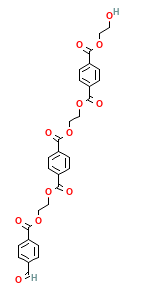

In [4]:
# Method to build a pdb file for the trimer and generate a residue code for it
builder.SmilesToPDB_GenResCode('OCCOC(=O)c1ccc(cc1)C(=O)OCCOC(=O)c2ccc(cc2)C(=O)OCCOC(=O)c3ccc(C=O)cc3', 'PET_trimer')

In [5]:
# Now we can check if this .pdb file exists using a method from tutorial 1
pdb_file = manager.load_pdb_filepath("PET_trimer")

# Print the pdb filepath
print(pdb_file)

/home/dan/polymersimulator/pdb_files/PET_trimer.pdb


Now we need to parameterize the PET trimer

In [6]:
# Parameterize the chitin trimer
#builder.parameterize_mol("PET_trimer") # if this line is hashed out, it means I already parameterized the trimer and it takes a looooong time

In [7]:
# Method for generating residue codes for different polymeric units - pass a trimer that has a residue code assigned
builder.GenRescode_4_PolyUnits("PET_trimer")

Head code assigned:  hDI
Mainchain code assigned:  mDI
Tail code assigned:  tDI


In [8]:
# Check if the chitin trimer was parameterized by seeing if the mol2 file was generated
output = manager.load_mol2_filepath("PET_trimer")
output

'/home/dan/polymersimulator/pdb_files/molecules/PET_trimer/PET_trimer.mol2'

Now we need to assign charges to the PET_trimer. This method uses the bcc semi-empirical method (there are other 'better' ways but this is well used method).

In [ ]:
builder.gen_ac_file("PET_trimer")

Now we can generate .prepi files for the polymeric units...

In [ ]:
# Method for generating prepin files for a file - using the trimer
builder.gen_prepin_files("PET_trimer")